

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [2]:
from IPython.display import IFrame
sheet_url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1"
IFrame(src=sheet_url, width=800, height=600)

# use many cells if you like to structure your code well


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [15]:
# your code here
# use many cells if you like to structure your code well
import pandas as pd

f = 'C:/Users/misha/Downloads/Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv'
db = pd.read_csv(f, header=1)
#new_header = db.iloc[0]
#db = db[1:]
#db.columns = new_header
db.head()





,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15,51,23,NaN,11.0
1,2004.0,February,NaN,7,4,5,2.0
2,2004.0,March,19,2,NaN,2,3.0
3,2004.0,April,5,3,19,NaN,3.0
4,2004.0,May,18,29,56,6,9.0


In [10]:
column_dict = {col: db[col].iloc[0] for col in db.columns}

print(column_dict)

{'Year': '2004', 'Month': 'January', 'Taliban': '15', 'Civilians': '51', 'Afghan forces': '23', 'Nato (detailed in spreadsheet)': nan, 'Nato - official figures': '11'}


## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

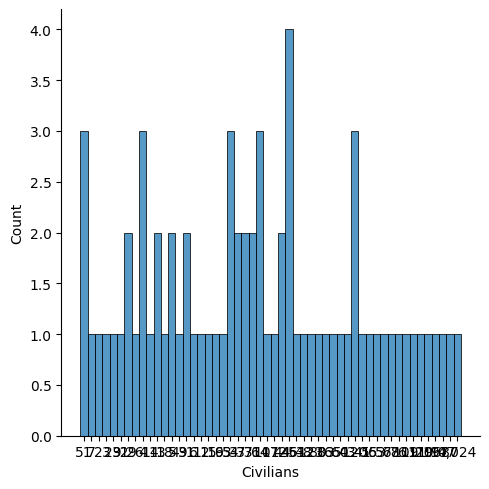

In [23]:
# your code here
# use many cells if you like to structure your code well
import seaborn as sns
_ = sns.displot(db['Civilians'], kde=False)

float64


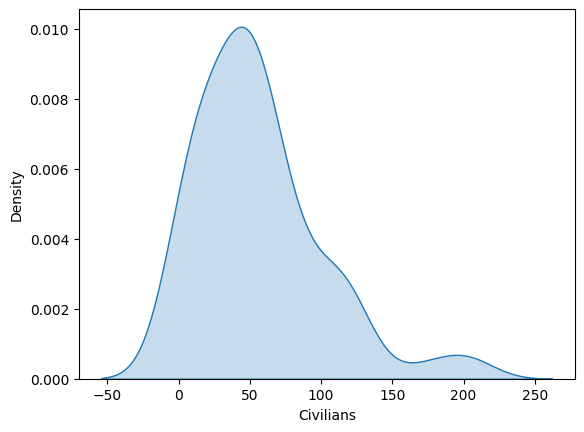

In [99]:
column_to_plot = 'Civilians'
print(db[column_to_plot].dtype)
db[column_to_plot] = pd.to_numeric(db[column_to_plot], errors='coerce')
db = db.dropna(subset=[column_to_plot])

_ = sns.kdeplot(db['Civilians'], fill=True)


## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [129]:
# your code here
# use many cells if you like to structure your code well

for index, row in db.iterrows():
    print(row['Civilians'])

51.0
7.0
2.0
3.0
29.0
32.0
19.0
26.0
4.0
14.0
19.0
13.0
4.0
4.0
18.0
5.0
49.0
31.0
5.0
6.0
12.0
15.0
13.0
16.0
93.0
54.0
37.0
33.0
54.0
71.0
64.0
101.0
172.0
44.0
46.0
51.0
53.0
33.0
48.0
123.0
71.0
80.0
83.0
65.0
64.0
46.0
60.0
37.0
43.0
120.0
41.0
55.0
54.0
51.0
120.0
46.0
63.0
56.0
78.0
76.0
31.0
46.0
64.0
44.0
109.0
111.0
119.0
206.0
197.0
107.0
120.0
87.0


In [27]:
new_dataframe = []
threshold = 20
for index, row in db.iterrows():
    if row['Civilians'] > threshold:
        new_dataframe.append(row)

new_db = pd.DataFrame(new_dataframe)

print(new_db)

      Year      Month Taliban  Civilians Afghan forces  \
0   2004.0    January      15       51.0            23   
4   2004.0        May      18       29.0            56   
5   2004.0       June     163       32.0            14   
7   2004.0     August      20       26.0            10   
16  2005.0        May     113       49.0            25   
17  2005.0       June     143       31.0             4   
24  2006.0    January      26       93.0            14   
25  2006.0   February      12       54.0           106   
26  2006.0      March      36       37.0            61   
27  2006.0      April      52       33.0            43   
28  2006.0        May      85       54.0            50   
29  2006.0       June     295       71.0            39   
30  2006.0       July     220       64.0            36   
31  2006.0     August     161      101.0            42   
32  2006.0  September     945      172.0            97   
33  2006.0    October     333       44.0            70   
34  2006.0   N

## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [28]:
Civilians_and_Afghan_forces_list = ["Civilians", "Afghan forces"]

Kept_columns = ['Year', 'Month'] + Civilians_and_Afghan_forces_list

Casualties_db = db[Kept_columns]

print(Casualties_db)


      Year      Month  Civilians Afghan forces
0   2004.0    January       51.0            23
1   2004.0   February        7.0             4
2   2004.0      March        2.0           NaN
3   2004.0      April        3.0            19
4   2004.0        May       29.0            56
..     ...        ...        ...           ...
68  2009.0  September      197.0           133
69  2009.0    October      107.0            86
70  2009.0   November      120.0            69
71  2009.0   December       87.0            65
72     NaN      24498        NaN         3,820

[73 rows x 4 columns]
